In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#データの確認
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [11]:
#maleを0,femaleを1に変換
df = pd.read_csv("train.csv").replace("male",0).replace("female",1) 

In [71]:
#Ageの欠損値を平均値を代入
#df["Age"].fillna(df.Age.median(),inplace=True)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([ 80.,  97., 372.]), array([136.,  87., 119.])],
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 2 Lists of Patches objects>)

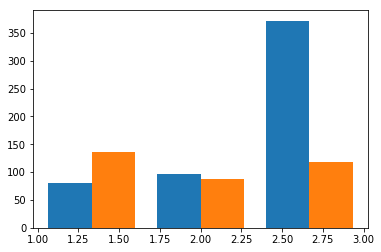

In [4]:
#客室のグレードごとの生存数をヒストグラムとして出力
split_data = []
for survived in [0,1]:
    split_data.append(df[df.Survived==survived])
    
temp = [i["Pclass"].dropna() for i in split_data]      #dropna() : 欠損値を削除


plt.hist(temp, bins=3, stacked=False)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([13., 13.,  8., 63., 80., 66., 47., 39., 30., 23., 14., 11., 10.,
          3.,  4.,  0.]),
  array([31.,  7., 11., 33., 42., 42., 41., 28., 17., 16., 10.,  7.,  4.,
          0.,  0.,  1.])],
 array([ 0.42   ,  5.39375, 10.3675 , 15.34125, 20.315  , 25.28875,
        30.2625 , 35.23625, 40.21   , 45.18375, 50.1575 , 55.13125,
        60.105  , 65.07875, 70.0525 , 75.02625, 80.     ]),
 <a list of 2 Lists of Patches objects>)

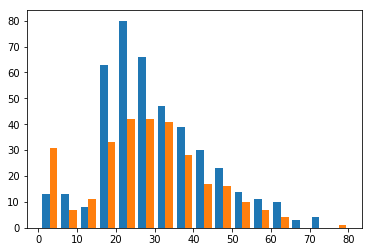

In [5]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, bins=16)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([468.,  81.]), array([109., 233.])],
 array([0. , 0.5, 1. ]),
 <a list of 2 Lists of Patches objects>)

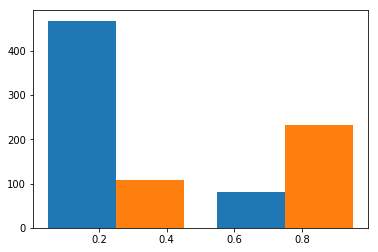

In [6]:
#性別での生存率差
temp = [i["Sex"].dropna() for i in split_data]
plt.hist(temp, bins=2)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([499.,  36.,   8.,   0.,   4.,   2.,   0.,   0.,   0.,   0.]),
  array([233.,  70.,  23.,   2.,   7.,   4.,   0.,   0.,   0.,   3.])],
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 2 Lists of Patches objects>)

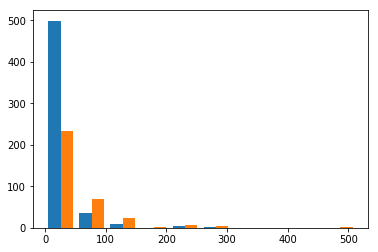

In [7]:
#性別での生存率差
temp = [i["Fare"].dropna() for i in split_data]
plt.hist(temp, bins=10)

In [13]:
#全データ数
df.shape

(891, 12)

In [14]:
#全死亡者数
train_1 = df.query('Survived == 0')
train_1.shape

(549, 12)

In [15]:
#男性者数
train_2 = df.query('Sex == 0')
train_2.shape

(577, 12)

In [16]:
#女性者数
train_3 = df.query('Sex == 1')
train_3.shape

(314, 12)

In [26]:
#まとめ
#男性で死亡
train_8 = df.query('Sex == 0')            
train_9 = train_8.query('Survived == 0')

#男性で生存
train_10 = df.query('Sex == 0')
train_11 = train_10.query('Survived == 1')

#女性で死亡
train_12 = df.query('Sex == 1')
train_13 = train_12.query('Survived == 0')

#女性で生存
train_14 = df.query('Sex == 1')
train_15 = train_14.query('Survived == 1')

print('男性で死亡 : ', len(train_9))
print('男性で生存 : ', len(train_11))
print('女性で死亡 : ', len(train_13))
print('女性で生存 : ', len(train_15))

男性で死亡 :  468
男性で生存 :  109
女性で死亡 :  81
女性で生存 :  233


In [48]:
#kai2乗検定(A/Bテスト(有意差判定))
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

#表示桁数の指定
%precision 3

'%.3f'

In [49]:
#データを用意する
ab_test_data = pd.DataFrame({
    "sex":["m", "m", "f", "f"],
    "survived":["s", "d", "s", "d"],
    "number":[109, 468, 81, 233]
})
print(ab_test_data)

   number sex survived
0     109   m        s
1     468   m        d
2      81   f        s
3     233   f        d


In [50]:
#クロス集計表に変換
cross_data = pd.pivot_table(
    data = ab_test_data,
    values ="number",
    aggfunc ="sum",
    index ="sex",
    columns ="survived"
)
print(cross_data)

survived    d    s
sex               
f         233   81
m         468  109


In [51]:
#χ2乗検定の実行
stats.chi2_contingency(cross_data, correction=False)

#以下出力はカイ二乗統計量、p値、自由度、期待度数の表となる

(5.779, 0.016, 1, array([[247.042,  66.958],
        [453.958, 123.042]]))

In [52]:
#Pclassでのχ2乗検定

#Pclass:1で死亡
train_16 = df.query('Pclass == 1')
train_17 = train_16.query('Survived == 0')
#Pclass:2で生存
train_18 = df.query('Pclass == 1')
train_19 = train_18.query('Survived ==1')

#Pclass:2で死亡
train_20 = df.query('Pclass == 2')
train_21 = train_20.query('Survived == 0')
#Pclass:2で生存
train_22 = df.query('Pclass == 2')
train_23 = train_22.query('Survived == 1')

#Pclass:3で死亡
train_24 = df.query('Pclass == 3')
train_25 = train_24.query('Survived == 0')
#Pclass:3で生存
train_26 = df.query('Pclass == 3')
train_27 = train_26.query('Survived == 1')

print('Pclass1で死亡 : ', len(train_17))
print('Pclass1で生存 : ', len(train_19))
print('Pclass2で死亡 : ', len(train_21))
print('Pclass2で生存 : ', len(train_23))
print('Pclass3で死亡 : ', len(train_25))
print('Pclass3で生存 : ', len(train_27))

Pclass1で死亡 :  80
Pclass1で生存 :  136
Pclass2で死亡 :  97
Pclass2で生存 :  87
Pclass3で死亡 :  372
Pclass3で生存 :  119


In [53]:
#データを用意する
ab_test_data_2 = pd.DataFrame({
    "Pclass":["P1", "P1", "P2", "P2", "P3", "P3"],
    "survived":["s", "d", "s", "d", "s", "d"],
    "number":[136, 80, 87, 97, 119, 372]
})
print(ab_test_data_2)

  Pclass  number survived
0     P1     136        s
1     P1      80        d
2     P2      87        s
3     P2      97        d
4     P3     119        s
5     P3     372        d


In [54]:
#クロス集計表に変換
cross_data_2 = pd.pivot_table(
    data = ab_test_data_2,
    values ="number",
    aggfunc ="sum",
    index ="Pclass",
    columns ="survived"
)
print(cross_data_2)

survived    d    s
Pclass            
P1         80  136
P2         97   87
P3        372  119


In [55]:
#χ2乗検定の実行
stats.chi2_contingency(cross_data_2, correction=False)

#以下出力はカイ二乗統計量、p値、自由度、期待度数の表となる

(102.889, 0.000, 2, array([[133.091,  82.909],
        [113.374,  70.626],
        [302.535, 188.465]]))

In [ ]:
#P値は帰無仮説(相関が無いと言う仮説)が成立する確率ゼロに近いほど関係性がないとなる